SVM Accuracy: 1.0000


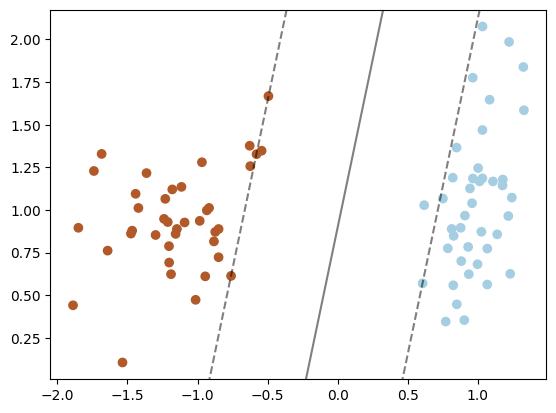

In [2]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        """
        Initialize the SVM classifier.

        Parameters:
        - learning_rate: Step size for gradient descent
        - lambda_param: Regularization parameter
        - n_iters: Number of iterations for training
        """
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        """
        Train the SVM model using gradient descent.

        Parameters:
        - X: Feature matrix (n_samples, n_features)
        - y: Target vector (n_samples,), with values {-1, 1}
        """
        n_samples, n_features = X.shape

        # Convert labels to {-1, 1} if they aren't already
        y_ = np.where(y <= 0, -1, 1)

        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient descent
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1

                if condition:
                    # Update weights for correct classification
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    # Update weights for misclassification
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        """
        Predict class labels for samples in X.

        Parameters:
        - X: Feature matrix (n_samples, n_features)

        Returns:
        - pred: Array of predicted class labels
        """
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)

    def decision_function(self, X):
        """Return the distance from the decision boundary"""
        return np.dot(X, self.w) - self.b

# Helper function to visualize the decision boundary
def plot_decision_boundary(svm, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

    # Create grid to evaluate model
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
               alpha=0.5, linestyles=['--', '-', '--'])

    plt.show()

# Example usage
if __name__ == "__main__":
    # Generate synthetic data
    X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                              n_informative=2, random_state=1,
                              n_clusters_per_class=1)

    # Convert labels to {-1, 1}
    y = np.where(y == 0, -1, 1)

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train SVM
    svm = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
    svm.fit(X_train, y_train)

    # Make predictions
    y_pred = svm.predict(X_test)

    # Calculate accuracy
    accuracy = np.mean(y_pred == y_test)
    print(f"SVM Accuracy: {accuracy:.4f}")

    # Visualize decision boundary
    plot_decision_boundary(svm, X_train, y_train)